# 2D Distance Properties Plots

### Importing Tables

In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dwarf_table = Table.read('dwarf_table.txt', format = 'ascii.commented_header')
dwarf_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549


In [4]:
gal_table = Table.read('gal_table.txt', format = 'ascii.commented_header')
gal_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID#,gamma_ratio
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32
-99.0,0.0,146.714215072841,-1.0412800233313741,0.021222278475761414,-19.30365562438965,2.3124398291110992,nan,nan,nan,nan,nan,nan,nan,nan,9,0,1
1.0,1.0,146.6285851269414,-0.7651620976591762,0.0646563172340393,-19.97649574279785,2.976039946079254,-11.241625785827637,nan,nan,nan,nan,nan,nan,nan,2,1,2
-99.0,0.0,146.63170644325592,-0.9883467023052999,0.05265425145626068,-18.431812286376953,1.7119742929935455,nan,nan,nan,nan,nan,nan,nan,nan,2,2,1
1.0,1.0,146.9341288729797,-0.6704053610430766,0.12127048522233963,-21.559162139892578,3.0934733152389526,-11.71275806427002,nan,nan,nan,nan,nan,nan,nan,9,3,2
-99.0,1.0,146.9634997327016,-0.5447758299302171,0.055980585515499115,-19.10099220275879,2.044341266155243,nan,nan,nan,nan,nan,nan,nan,nan,2,4,1


## Getting values for Difference in Metallicity and N/O Ratio (Target - Neighboring)

In [5]:
#creating the new columns
dwarf_table['3D_Z12logOH_diff'] = np.nan
dwarf_table['3D_logNO_diff'] = np.nan

In [6]:
for i in range(len(dwarf_table)):
    
    di = gal_table['ID#'] == dwarf_table['3D_neighbor_ID'][i] #finding 2D neighboring galaxy in the large table
    
    dwarf_table['3D_Z12logOH_diff'][i] = dwarf_table['Z12logOH'][i] - gal_table['Z12logOH'][di]
    dwarf_table['3D_logNO_diff'][i] = dwarf_table['logNO'][i] - gal_table['logNO'][di]

In [7]:
dwarf_table[:20]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir,3D_Z12logOH_diff,3D_logNO_diff
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,float64,int32,float64,int32,float64,float64,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463,nan,nan
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274,nan,nan
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734,nan,nan
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821,nan,nan
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549,nan,nan
21.37,1.0,146.28299647851426,0.0641463074401177,0.021579895168542862,-16.594152450561523,2.861306369304657,-10.189197540283203,nan,nan,nan,nan,nan,nan,nan,2,91,80,0.038323438909891316,92,0.17226127693210824,92,0.10268810550034341,92,0.3052372880294029,nan,nan
0.0,1.0,145.3209420527222,0.771115298508063,0.00658948952332139,-14.810564994812012,1.925416886806488,-9.748167991638184,nan,0.0,3.57494352664153,7.007952737418975,0.2935407103312847,-0.9956427104372425,0.4090425521885854,2,186,208,0.16133006586884238,208,0.576340261650062,208,0.6516081633066332,208,2.3278241244801396,nan,nan
-99.0,1.0,145.4212238164792,0.5359777701124617,0.1459859162569046,-14.866592407226562,-3.4473413228988647,nan,nan,nan,nan,nan,nan,nan,nan,9,209,206,0.23624643923335842,206,0.5428900018158784,206,0.53709656480362,206,1.2342380947105809,nan,nan
0.0,1.0,146.26576246056774,1.2304320197663696,0.006355164106935263,-14.2352876663208,1.6930833458900452,-9.700735092163086,nan,0.0,4.040375795270858,7.048466376827344,0.3785143362106475,-1.2323400004904403,0.5170923842950506,2,238,55137,0.13915957213413985,55243,0.8924983833408165,55137,0.18685834815465546,208,1.4133282793228592,-0.6413813818611205,0.08962193300563204


# Making Plots

## Color (u-r)

In [8]:
# Separating into Void, Wall, or Other Dwarf Galaxies

dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)

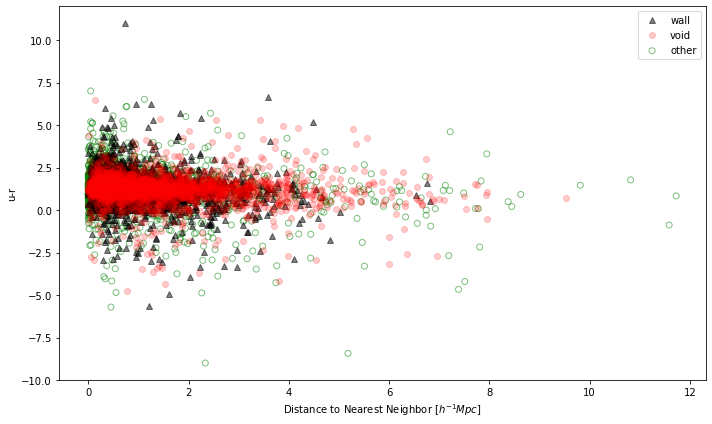

In [9]:
plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_wall], dwarf_table['u_r'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_void], dwarf_table['u_r'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_neighbor_dist'][dwarf_other], dwarf_table['u_r'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('u-r');

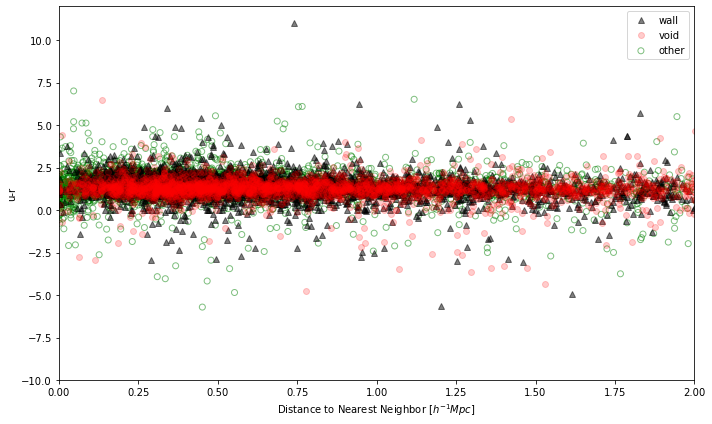

In [15]:
#limiting x axis

plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_wall], dwarf_table['u_r'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_void], dwarf_table['u_r'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_neighbor_dist'][dwarf_other], dwarf_table['u_r'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('u-r')

plt.xlim([0,2]);

## Specific Star Formation Rate (sSFR)

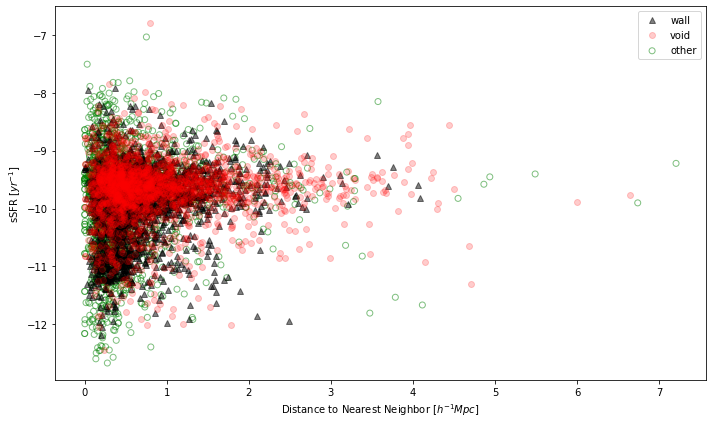

In [12]:
plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_wall], dwarf_table['sSFR'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_void], dwarf_table['sSFR'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_neighbor_dist'][dwarf_other], dwarf_table['sSFR'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('sSFR [$yr^{-1}]$');

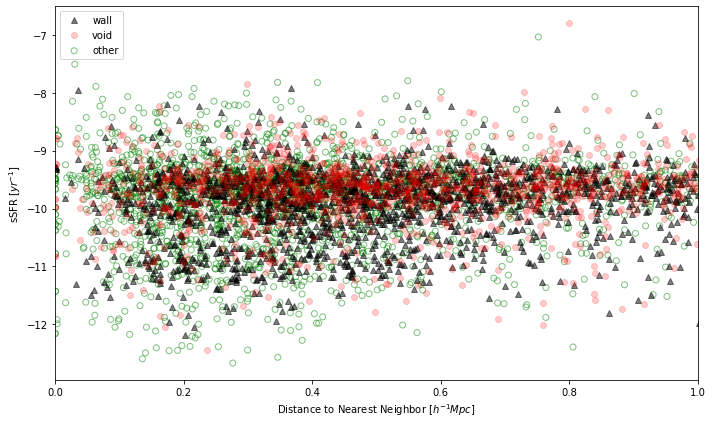

In [14]:
#limiting x axis

plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_wall], dwarf_table['sSFR'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_void], dwarf_table['sSFR'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_neighbor_dist'][dwarf_other], dwarf_table['sSFR'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('sSFR [$yr^{-1}]$');

plt.xlim([0,1]);


## Metallicity (12 + log(O/H))

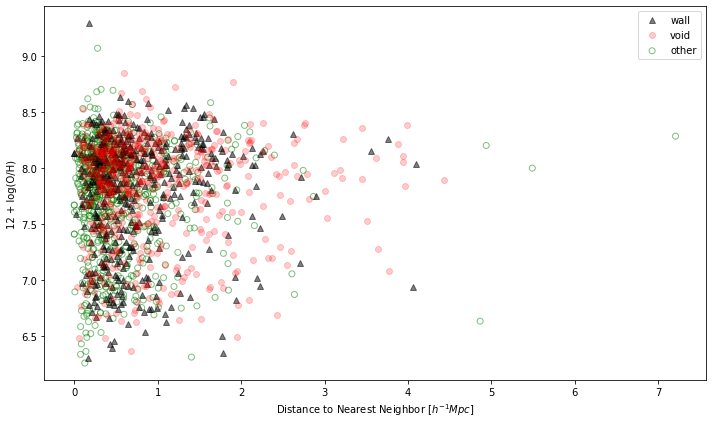

In [16]:
plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_wall], dwarf_table['Z12logOH'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_void], dwarf_table['Z12logOH'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_neighbor_dist'][dwarf_other], dwarf_table['Z12logOH'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('12 + log(O/H)');

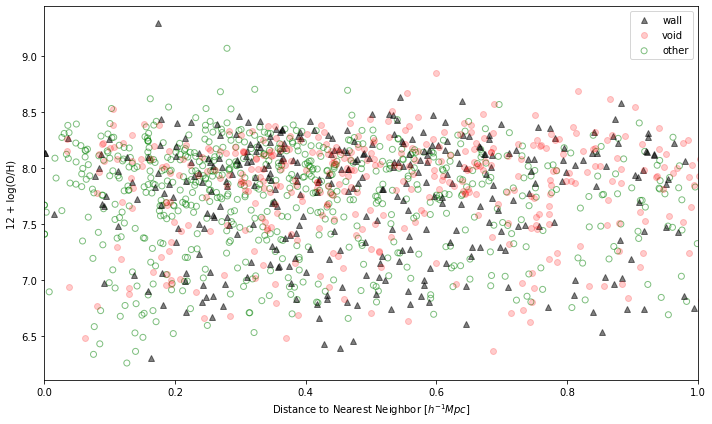

In [17]:
# limiting x axis

plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_wall], dwarf_table['Z12logOH'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_void], dwarf_table['Z12logOH'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_neighbor_dist'][dwarf_other], dwarf_table['Z12logOH'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('12 + log(O/H)')

plt.xlim([0,1]);

## Metallicity Difference (target - neighbor)

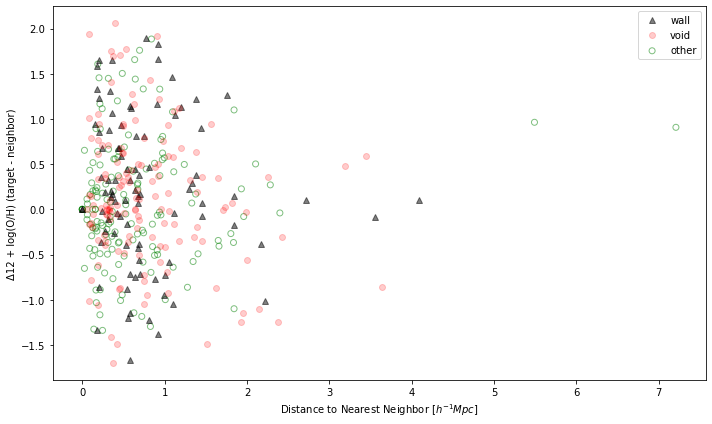

In [18]:
plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_wall], dwarf_table['3D_Z12logOH_diff'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_void], dwarf_table['3D_Z12logOH_diff'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_neighbor_dist'][dwarf_other], dwarf_table['3D_Z12logOH_diff'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('Δ12 + log(O/H) (target - neighbor)');

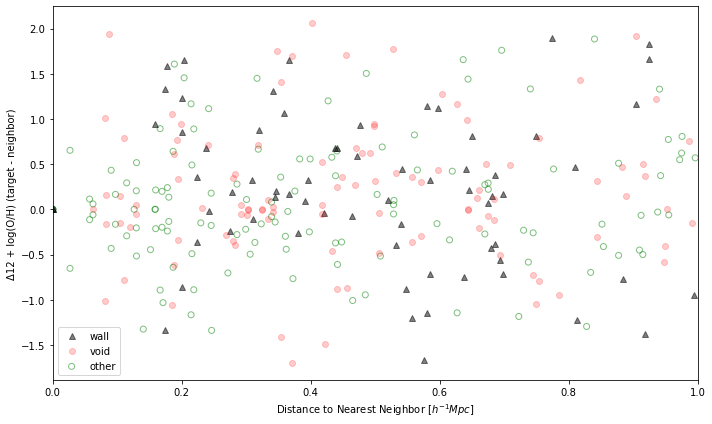

In [20]:
#limiting x axis

plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_wall], dwarf_table['3D_Z12logOH_diff'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_void], dwarf_table['3D_Z12logOH_diff'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_neighbor_dist'][dwarf_other], dwarf_table['3D_Z12logOH_diff'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('Δ12 + log(O/H) (target - neighbor)')

plt.xlim([0,1]);

## N/O Ratio

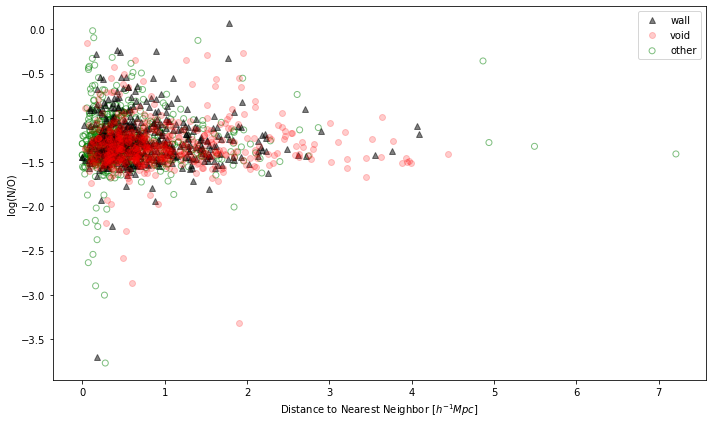

In [21]:
plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_wall], dwarf_table['logNO'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_void], dwarf_table['logNO'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_neighbor_dist'][dwarf_other], dwarf_table['logNO'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('log(N/O)');

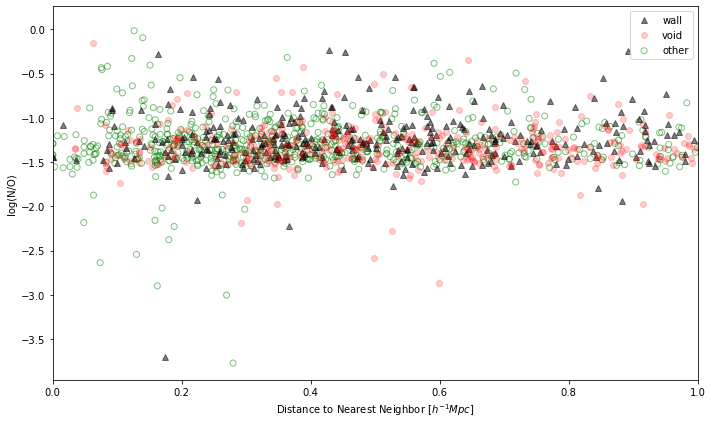

In [22]:
# limiting x axis

plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_wall], dwarf_table['logNO'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_void], dwarf_table['logNO'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_neighbor_dist'][dwarf_other], dwarf_table['logNO'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('log(N/O)')

plt.xlim([0,1]);

## N/O Ratio Difference (target - neighbor)

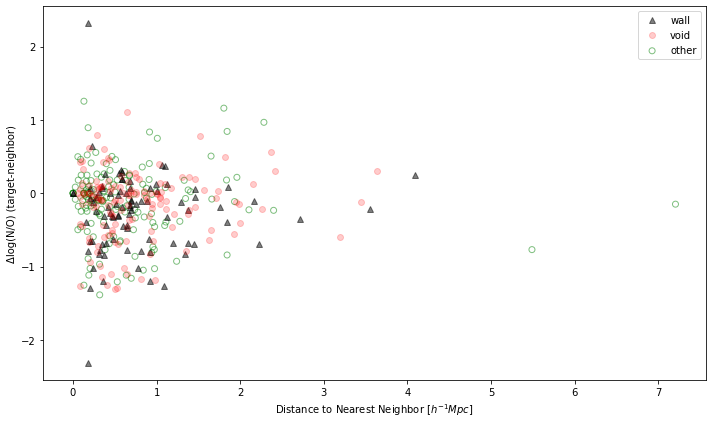

In [23]:
plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_wall], dwarf_table['3D_logNO_diff'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_void], dwarf_table['3D_logNO_diff'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_neighbor_dist'][dwarf_other], dwarf_table['3D_logNO_diff'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('Δlog(N/O) (target-neighbor)');

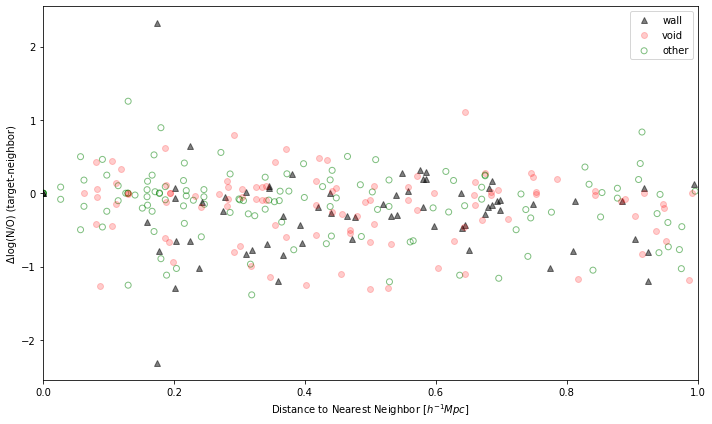

In [25]:
# limiting x axis

plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_wall], dwarf_table['3D_logNO_diff'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_neighbor_dist'][dwarf_void], dwarf_table['3D_logNO_diff'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_neighbor_dist'][dwarf_other], dwarf_table['3D_logNO_diff'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('Δlog(N/O) (target-neighbor)')

plt.xlim([0,1]);